In [4]:
import numpy as np#데이터분석용
import pandas as pd#데이터분석용
import matplotlib.pyplot as plt#데이터시각화
import seaborn as sns#데이터시각화
%matplotlib inline
import warnings
warnings.filterwarnings(action='ignore')

In [5]:
raw_data = pd.read_excel('../csv-data/titanic.xls')
raw_data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [6]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [7]:
raw_data.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [8]:
svc = raw_data['survived'].value_counts()

In [9]:
svc

0    809
1    500
Name: survived, dtype: int64

In [10]:
type(svc)

pandas.core.series.Series

In [11]:
#살았는지 죽었는지 시각화
#인덱스가 death와 alived로 되어있어야 함!

In [12]:
svc.index = ['death','alived']

In [13]:
svc

death     809
alived    500
Name: survived, dtype: int64

Text(0.5, 1.0, 'Survived2')

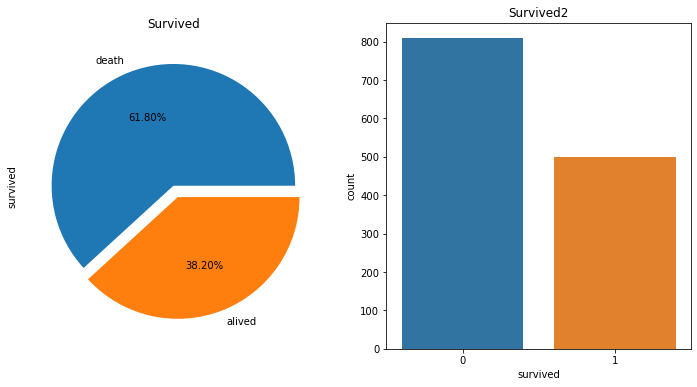

In [14]:
f, ax = plt.subplots(1,2,figsize=(12,6))
svc.plot.pie(explode=[0,0.1], autopct='%1.2f%%', ax = ax[0])
ax[0].set_title('Survived')

sns.countplot('survived', data=raw_data, ax = ax[1])
ax[1].set_title('Survived2')


<AxesSubplot:xlabel='age', ylabel='count'>

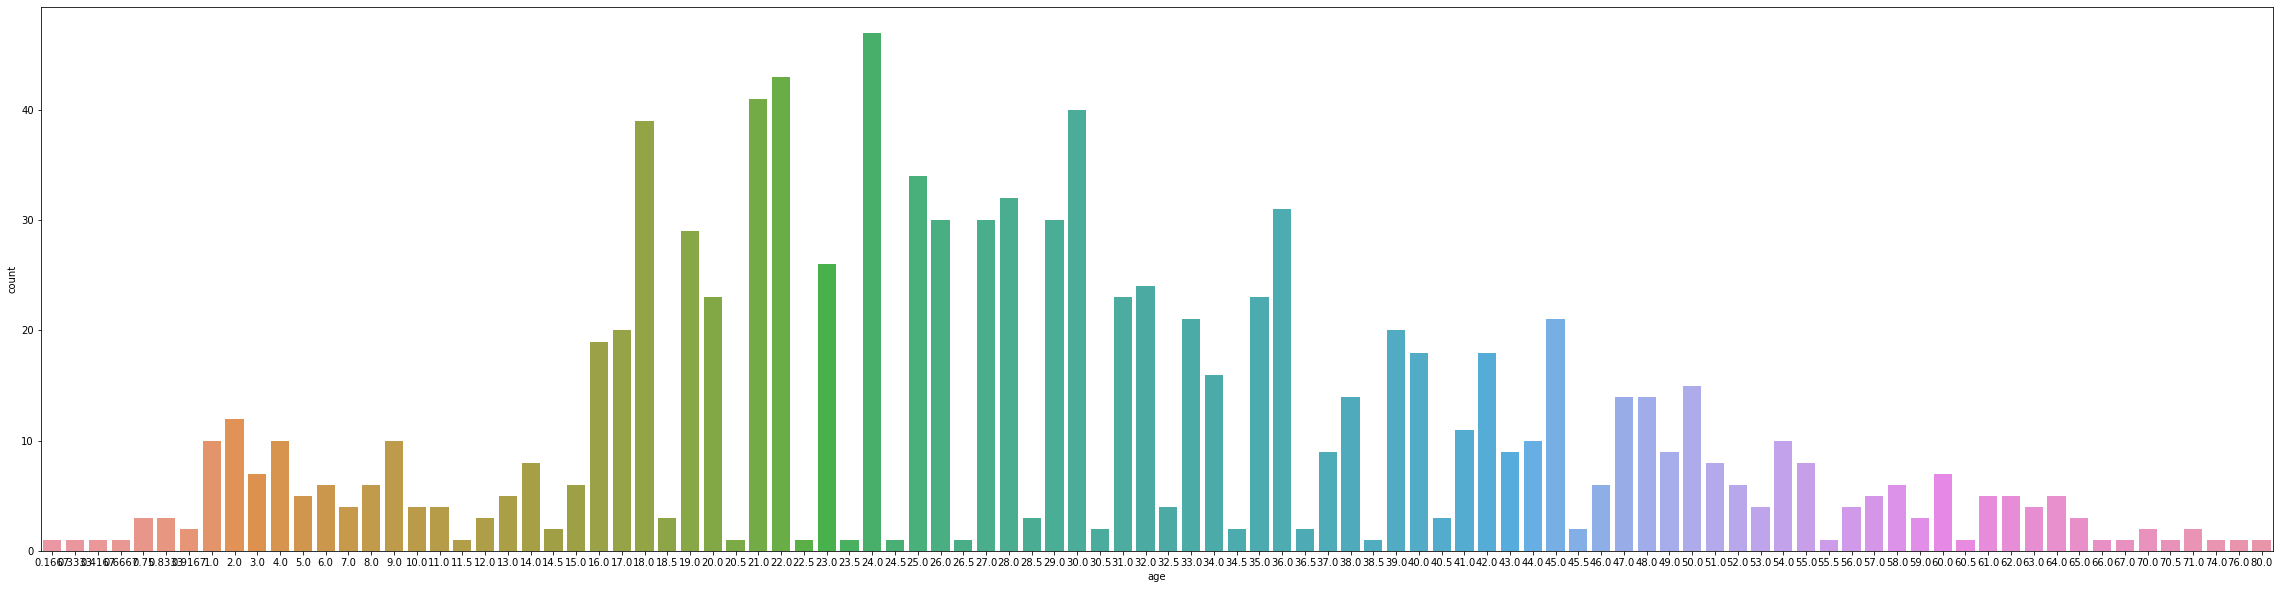

In [15]:
plt.figure(figsize=(40,10))
sns.countplot('age', data=raw_data)

In [16]:
#pclass별 평균, 산거, 죽은거 비율
#pclass로 그룹 지어줘야함!
pclass_mean = raw_data.groupby(by='pclass').mean()
pclass_mean

,survived,age,sibsp,parch,fare,body
pclass,,,,,,
1,0.619195,39.159918,0.436533,0.365325,87.508992,162.828571
2,0.429603,29.506705,0.393502,0.368231,21.179196,167.387097
3,0.255289,24.816367,0.568406,0.400564,13.302889,155.818182


In [17]:
#pclass 평균별 산 비율 그래프로 그려보기.

In [18]:
#pclass가 index인 survived컬럼을 가진 df를 생성해보자.
pclass_mean_survived = pclass_mean['survived']
pclass_mean_survived

pclass
1    0.619195
2    0.429603
3    0.255289
Name: survived, dtype: float64

Text(0.5, 1.0, 'pclass')

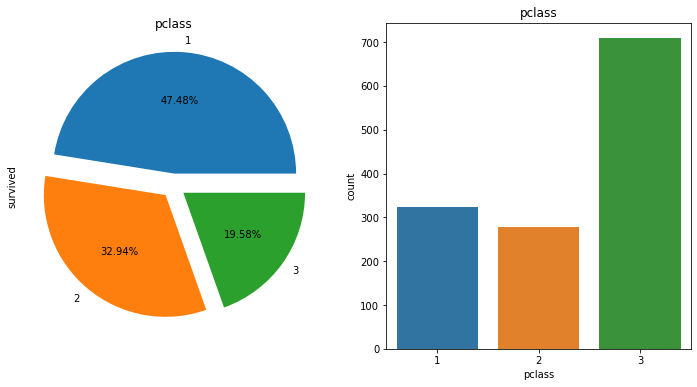

In [19]:
f, ax = plt.subplots(1,2,figsize=(12,6))
pclass_mean_survived.plot.pie(explode=[0.1,0.1,0.1],autopct='%1.2f%%', ax = ax[0])
ax[0].set_title('pclass')

sns.countplot('pclass', data= raw_data, ax = ax[1])
ax[1].set_title('pclass')

In [20]:
#각 컬럼들간의 상관도를 그려보자.
rc = raw_data.corr()
rc

,pclass,survived,age,sibsp,parch,fare,body
pclass,1.000000,-0.312469,-0.408106,0.060832,0.018322,-0.558629,-0.034642
survived,-0.312469,1.000000,-0.055513,-0.027825,0.082660,0.244265,NaN
age,-0.408106,-0.055513,1.000000,-0.243699,-0.150917,0.178739,0.058809
sibsp,0.060832,-0.027825,-0.243699,1.000000,0.373587,0.160238,-0.099961
parch,0.018322,0.082660,-0.150917,0.373587,1.000000,0.221539,0.051099
fare,-0.558629,0.244265,0.178739,0.160238,0.221539,1.000000,-0.043110
body,-0.034642,NaN,0.058809,-0.099961,0.051099,-0.043110,1.000000


In [ ]:
#heatmap그려보기.
plt.figure(figsize=(15,15))
sns.heatmap(rc, linewidths=0.01, annot=True,cmap=plt.cm.viridis, linecolor='white')
plt.title('correlation between features')
plt.show()

In [ ]:
rd_sex = raw_data['sex'].value_counts()
rd_sex

In [ ]:
#남자와 여자 탑승 비율을 바 그래프로 그려보자.

In [ ]:
plt.figure(figsize=(10,10))
sns.countplot('sex',data=raw_data)

In [ ]:
#성별 생사 인원을 구해보고, 그래프로 그려보세요
sex_alive = raw_data.groupby(by='sex')['survived'].sum()
print(sex_alive)
list_sa = list(sex_alive)
print(list_sa)

# # 성별 생사인원 구해보고, 그래프로 그려보세요!
# sex_alive = raw_data.groupby(by='sex')['survived'].sum() #1을 다 더하면, 생존인원이 될 것임.
# print(sex_alive)
# list_sa = list(sex_alive)
# list_sa.reverse()
# list_sa ##생존인원

In [ ]:
list_sa.reverse()#파괴함수라서 list_sa = list_sa.reverse()이렇게 쓰면 에러남.
list_sa

In [ ]:
list_sa

In [ ]:
# rd_sex = raw_data['sex'].value_counts()
print(rd_sex)
rd_sex_list = list(rd_sex)

rd_sex_list


In [ ]:
list_sa

In [ ]:
for i in range(2):
    print(rd_sex.index[i])
    print('생존인원: ', list_sa[i], '<->탑승인원: ', rd_sex_list[i])

In [ ]:
#성별에따른 탑승과 산 사람 비율을 바 그래프로 표현
#일단 df를 만들어야 하는데 인덱스는 sex로 하고 survived,board를 컬럼으로 잡아야한다.
sex_df = pd.DataFrame({'alive': list_sa, 'board': rd_sex_list}, index=['male', 'female'])

In [ ]:
sex_df

In [ ]:
sex_df.reset_index(inplace=True)


In [ ]:
sex_df

In [ ]:
#죽은 사람은 몇명인지 성별 별로 구해보자.
list_sa#생존인원
rd_sex#탑승인원
death_result = sex_df['board'] - sex_df['alive']
death_result

In [ ]:
#성별에 따른 탑승인원과 생존비율을 그래프로 그려보자.
f, ax = plt.subplots(1,2, figsize=(12,6))
sns.barplot('index','board', data=sex_df,ax = ax[0])
sns.barplot('index','alive', data=sex_df, ax = ax[1])

In [ ]:
raw_data['survived'].value_counts()#500명이 살았는데 남녀 비율이 161:339이다.

In [ ]:
raw_data.groupby(by='sex')['survived'].sum()

In [ ]:
sex_df

In [ ]:
#성별에따른 탑승과 산 사람 비율을 바 그래프로 표현

In [ ]:
plt.figure(figsize=(10,6))
sex_df.plot(kind='bar')
plt.show()


In [ ]:
#머신러닝을 돌리기 위해 df 의 값들을 모두 숫자로 바꿔줘야 한다.
#성별0이면 남자 1이면 여자
#나이 0이면 children,1이면 young, 3이면 adult

In [ ]:
raw_data.head()